In [2]:
import os
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
from scipy.stats import sem
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True, style="white")
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
def normalize(values):
    minval = values.min()
    normval = (values - minval) / np.ptp(values)
    return normval

In [ ]:
labels = ["GFP", "JF549", "Cy5.5"]
colors = [
    "#00B7EB",
    "#FFC40C",
    "#CA1F7B",
]

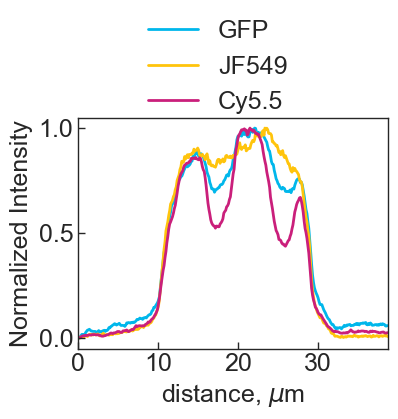

In [ ]:
folder = "/Volumes/guttman/Guoming_Gao-Resnick/Data_BIF/DEFAULT_USER/20250424_ONIdemo_Guoming/Praneeth_data/EZH2_add_salmon/beforebleach"
os.chdir(folder)
fnames = [
    "cell1-GFP.csv",
    "cell1-JF549.csv",
    "cell1-Cy55.csv",
]
lst_df = [pd.read_csv(fname) for fname in fnames]
key1 = lst_df[0].keys()[0]
df = pd.DataFrame(
    {
        "pixels": np.concat(
            [
                lst_df[0][key1].to_numpy(),
                lst_df[1][key1].to_numpy(),
                lst_df[2][key1].to_numpy(),
            ]
        ),
        "label": np.concat(
            [
                np.repeat(labels[0], lst_df[0].shape[0]),
                np.repeat(labels[1], lst_df[1].shape[0]),
                np.repeat(labels[2], lst_df[2].shape[0]),
            ]
        ),
        "normval": np.concat(
            [
                normalize(lst_df[0]["Gray_Value"].to_numpy()),
                normalize(lst_df[1]["Gray_Value"].to_numpy()),
                normalize(lst_df[2]["Gray_Value"].to_numpy()),
            ]
        ),
    }
)
plt.figure(figsize=(4,3))
ax = sns.lineplot(
    data=df,
    x="pixels",
    y="normval",
    hue="label",
    lw=2,
    dashes=False,
    palette=colors,
)
sns.move_legend(
    ax,
    "upper center",
    bbox_to_anchor=(0.45, 1.52),
    ncol=1,
    title=None,
    frameon=False,
    fontsize=18,
)
plt.xlim(df.pixels.min(), df.pixels.max())
ax.set_xlabel(r"distance, $\mu$m", fontsize=18, loc="center")
plt.ylabel("Normalized Intensity", fontsize=18)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.savefig(
    "CrossSectionLineNormalized-cell1.png",
    format="png",
    bbox_inches="tight",
    dpi=300,
)

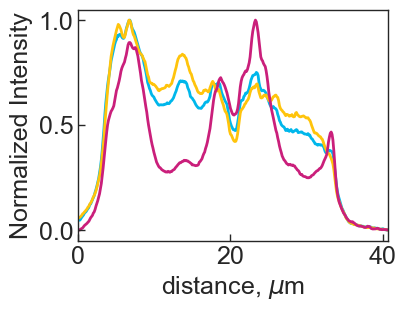

In [ ]:
folder = "/Volumes/guttman/Guoming_Gao-Resnick/Data_BIF/DEFAULT_USER/20250424_ONIdemo_Guoming/Praneeth_data/EZH2_add_salmon/beforebleach"
os.chdir(folder)
fnames = [
    "cell2-GFP.csv",
    "cell2-JF549.csv",
    "cell2-Cy55.csv",
]
lst_df = [pd.read_csv(fname) for fname in fnames]
key1 = lst_df[0].keys()[0]
df = pd.DataFrame(
    {
        "pixels": np.concat(
            [
                lst_df[0][key1].to_numpy(),
                lst_df[1][key1].to_numpy(),
                lst_df[2][key1].to_numpy(),
            ]
        ),
        "label": np.concat(
            [
                np.repeat(labels[0], lst_df[0].shape[0]),
                np.repeat(labels[1], lst_df[1].shape[0]),
                np.repeat(labels[2], lst_df[2].shape[0]),
            ]
        ),
        "normval": np.concat(
            [
                normalize(lst_df[0]["Gray_Value"].to_numpy()),
                normalize(lst_df[1]["Gray_Value"].to_numpy()),
                normalize(lst_df[2]["Gray_Value"].to_numpy()),
            ]
        ),
    }
)
plt.figure(figsize=(4,3))
ax = sns.lineplot(
    data=df,
    x="pixels",
    y="normval",
    hue="label",
    lw=2,
    dashes=False,
    palette=colors,
    legend=False,
)
plt.xlim(df.pixels.min(), df.pixels.max())
ax.set_xlabel(r"distance, $\mu$m", fontsize=18, loc="center")
plt.ylabel("Normalized Intensity", fontsize=18)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.savefig(
    "CrossSectionLineNormalized-cell2.png",
    format="png",
    bbox_inches="tight",
    dpi=300,
)

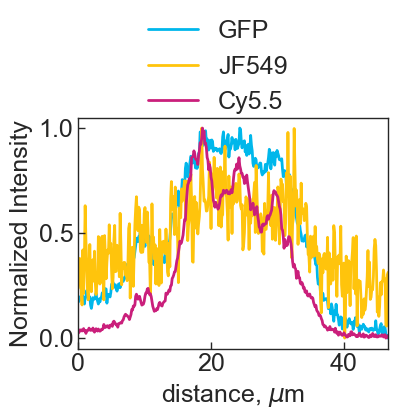

In [31]:
folder = "/Volumes/guttman/Guoming_Gao-Resnick/Data_BIF/DEFAULT_USER/20250424_ONIdemo_Guoming/Praneeth_data/negative_control/beforebleach"
os.chdir(folder)
fnames = [
    "cell1-GFP.csv",
    "cell1-JF549.csv",
    "cell1-Cy55.csv",
]
lst_df = [pd.read_csv(fname) for fname in fnames]
key1 = lst_df[0].keys()[0]
df = pd.DataFrame(
    {
        "pixels": np.concat(
            [
                lst_df[0][key1].to_numpy(),
                lst_df[1][key1].to_numpy(),
                lst_df[2][key1].to_numpy(),
            ]
        ),
        "label": np.concat(
            [
                np.repeat(labels[0], lst_df[0].shape[0]),
                np.repeat(labels[1], lst_df[1].shape[0]),
                np.repeat(labels[2], lst_df[2].shape[0]),
            ]
        ),
        "normval": np.concat(
            [
                normalize(lst_df[0]["Gray_Value"].to_numpy()),
                normalize(lst_df[1]["Gray_Value"].to_numpy()),
                normalize(lst_df[2]["Gray_Value"].to_numpy()),
            ]
        ),
    }
)
plt.figure(figsize=(4,3))
ax = sns.lineplot(
    data=df,
    x="pixels",
    y="normval",
    hue="label",
    lw=2,
    dashes=False,
    palette=colors,
)
sns.move_legend(
    ax,
    "upper center",
    bbox_to_anchor=(0.45, 1.52),
    ncol=1,
    title=None,
    frameon=False,
    fontsize=18,
)
plt.xlim(df.pixels.min(), df.pixels.max())
ax.set_xlabel(r"distance, $\mu$m", fontsize=18, loc="center")
plt.ylabel("Normalized Intensity", fontsize=18)
plt.gca().spines[:].set_linewidth(1)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=18,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.gca().set_axisbelow(False)
plt.savefig(
    "CrossSectionLineNormalized-cell1.png",
    format="png",
    bbox_inches="tight",
    dpi=300,
)